<a href="https://colab.research.google.com/github/oce-micky/Data-Analytics-Using-IBM_SPSS/blob/main/Copy_of_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from sklearn.metrics import accuracy_score, confusion_matrix


%matplotlib inline

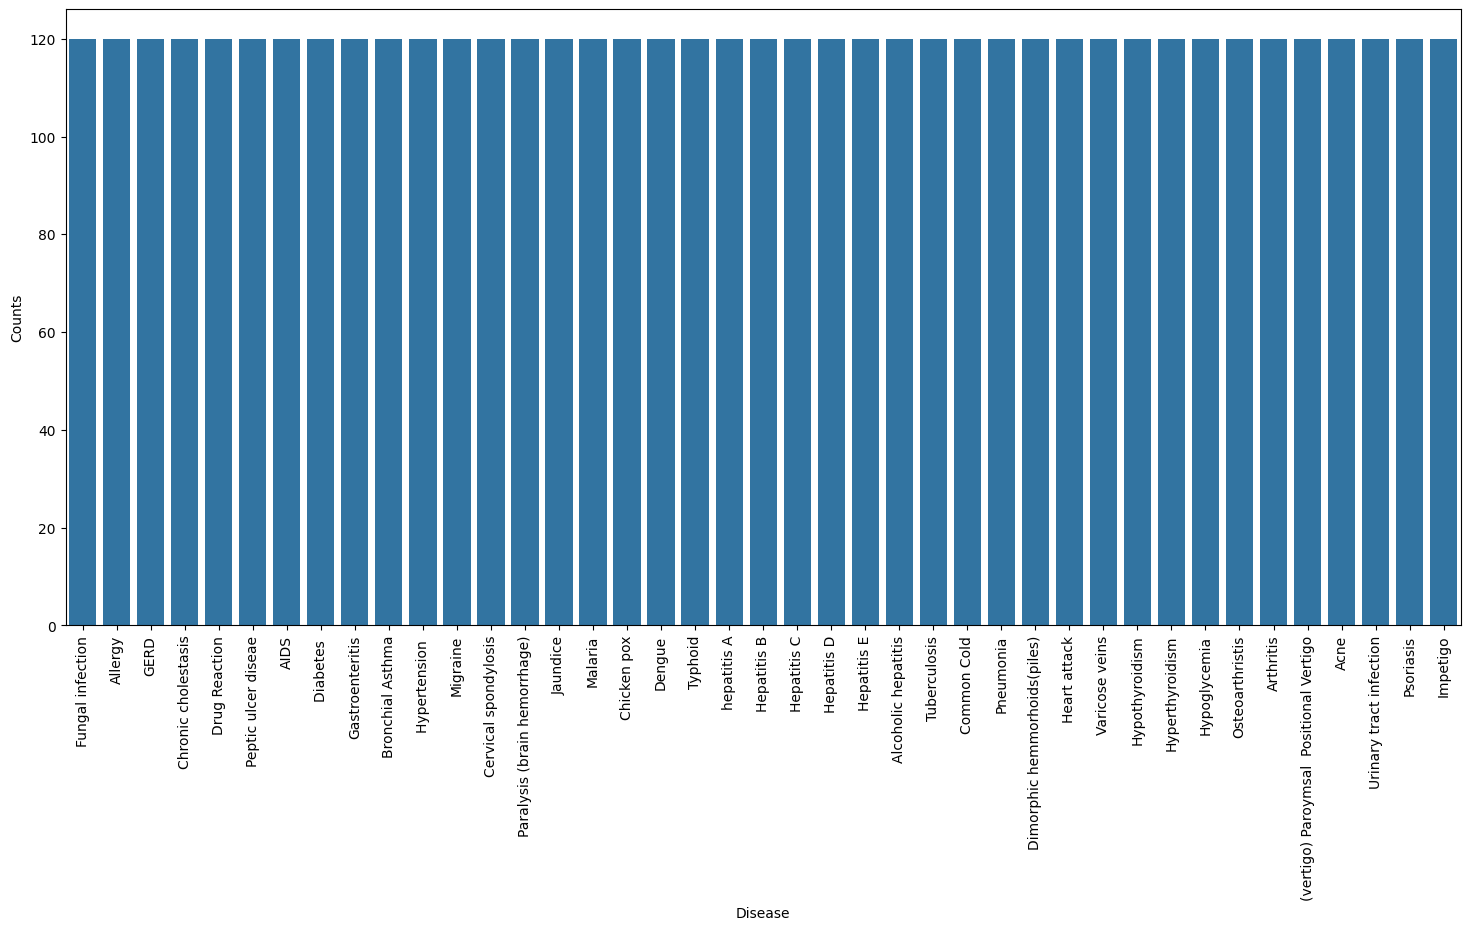

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Separate features (symptoms) and target (prognosis)
X = data.drop(columns=["prognosis"])
y = data["prognosis"]

# Save the LabelEncoder to a file
dump(encoder, 'label_encoder.joblib')

# Verify that 'prognosis' is the last column and extract symptoms
symptoms = data.columns[:-1]  # Assuming the last column is 'prognosis'
print("Symptoms:", symptoms)

Symptoms: Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


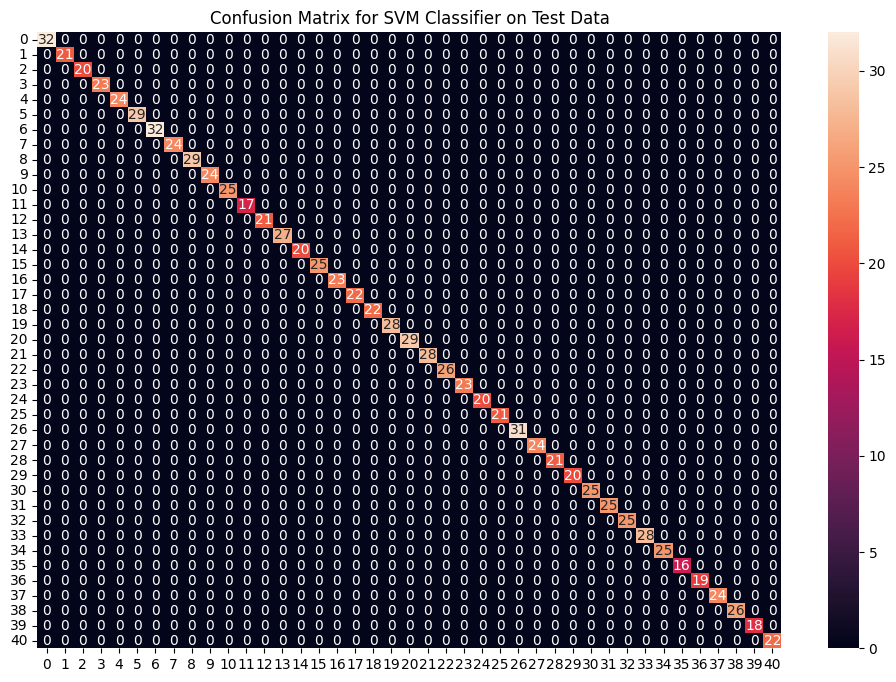

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


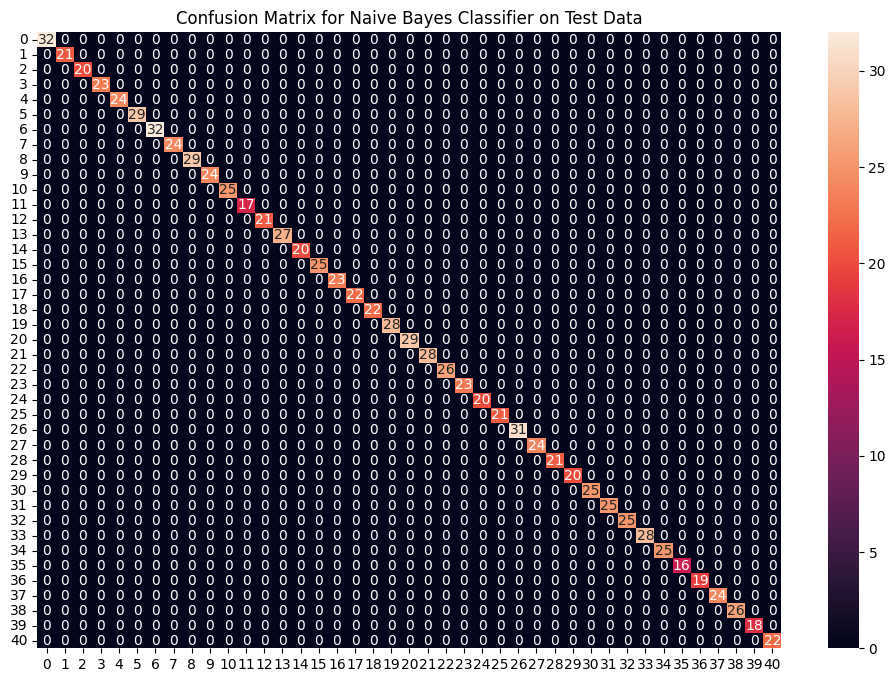

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


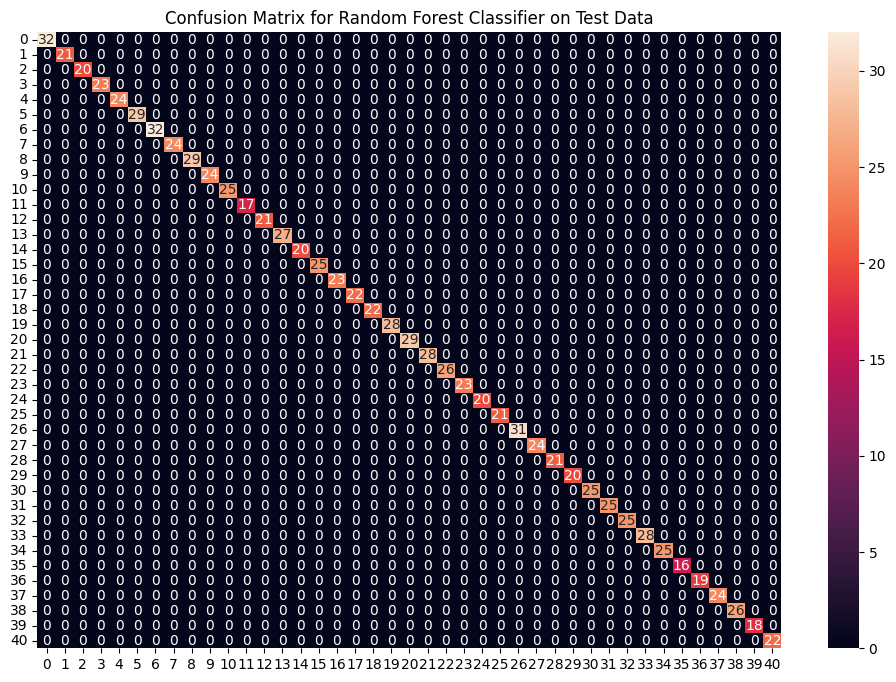

In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Accuracy on Test dataset by the combined model: 100.00%


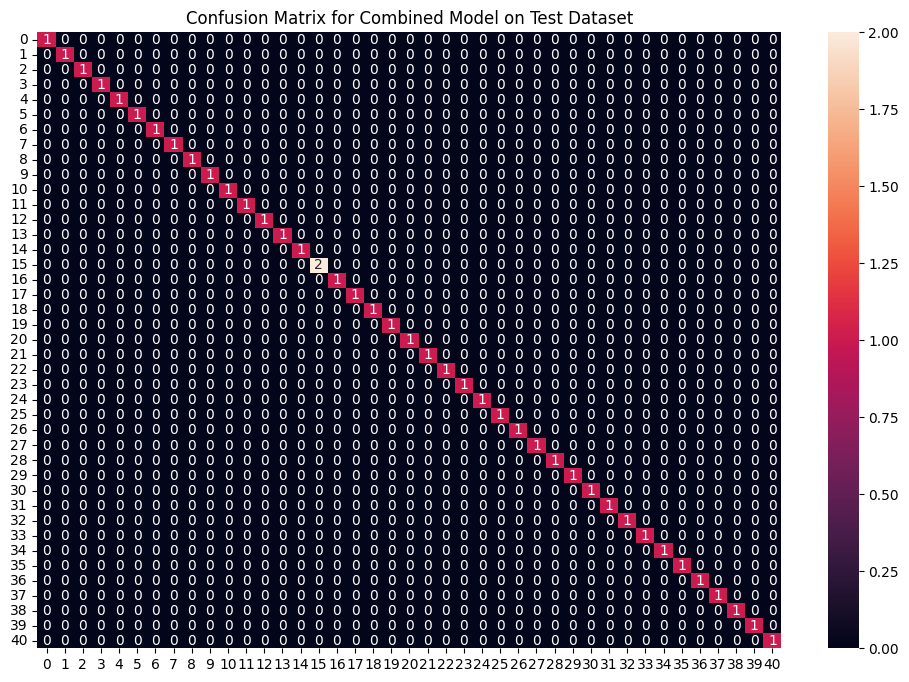

In [ ]:
# Re-import joblib to ensure it is recognized in this cell
from joblib import dump

# Training the models on the whole dataset
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Saving the models using joblib
dump(final_svm_model, 'SVM_MODEL.joblib')
dump(final_nb_model, 'NAIVE_BAYES_MODEL.joblib')
dump(final_rf_model, 'RF_MODEL.joblib')

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions and taking the mode of predictions made by all classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Mode calculation using stats.mode
from scipy import stats
final_preds = [stats.mode([i, j, k], keepdims=False)[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Printing the accuracy
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

# Confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))




{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
print(predictDisease('Joint Pain'))

{'rf_model_prediction': 'Osteoarthristis', 'naive_bayes_prediction': 'Osteoarthristis', 'svm_model_prediction': 'AIDS', 'final_prediction': 'Osteoarthristis'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:

print(data_dict["symptom_index"].keys())


dict_keys(['Itching', 'Skin Rash', 'Nodal Skin Eruptions', 'Continuous Sneezing', 'Shivering', 'Chills', 'Joint Pain', 'Stomach Pain', 'Acidity', 'Ulcers On Tongue', 'Muscle Wasting', 'Vomiting', 'Burning Micturition', 'Spotting  urination', 'Fatigue', 'Weight Gain', 'Anxiety', 'Cold Hands And Feets', 'Mood Swings', 'Weight Loss', 'Restlessness', 'Lethargy', 'Patches In Throat', 'Irregular Sugar Level', 'Cough', 'High Fever', 'Sunken Eyes', 'Breathlessness', 'Sweating', 'Dehydration', 'Indigestion', 'Headache', 'Yellowish Skin', 'Dark Urine', 'Nausea', 'Loss Of Appetite', 'Pain Behind The Eyes', 'Back Pain', 'Constipation', 'Abdominal Pain', 'Diarrhoea', 'Mild Fever', 'Yellow Urine', 'Yellowing Of Eyes', 'Acute Liver Failure', 'Fluid Overload', 'Swelling Of Stomach', 'Swelled Lymph Nodes', 'Malaise', 'Blurred And Distorted Vision', 'Phlegm', 'Throat Irritation', 'Redness Of Eyes', 'Sinus Pressure', 'Runny Nose', 'Congestion', 'Chest Pain', 'Weakness In Limbs', 'Fast Heart Rate', 'Pain 

In [ ]:
# --- IMPORTS ---
import gradio as gr
import statistics
import pandas as pd
import numpy as np

# --- PART 1: DOCTOR DATABASE (Lucknow Specialists) ---
doctor_directory = {
    "Fungal infection": "Dr. Sneha Gupta (Dermatologist) | Location: Gomti Nagar | Contact: 987-654-3210",
    "Allergy": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "GERD": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Chronic cholestasis": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Drug Reaction": "Dr. Anjali Singh (General Physician) | Location: Indira Nagar | Contact: 999-888-7777",
    "Peptic ulcer diseae": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "AIDS": "Dr. R.K. Mishra (Immunologist) | Location: KGMU Hospital | Contact: 102 (Emergency)",
    "Diabetes": "Dr. A. Khan (Endocrinologist) | Location: Charbagh | Contact: 777-666-5555",
    "Gastroenteritis": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Bronchial Asthma": "Dr. S. Yadav (Pulmonologist) | Location: Chowk | Contact: 555-444-3333",
    "Hypertension": "Dr. Amit Kumar (Cardiologist) | Location: Sahara Hospital | Contact: 111-222-3333",
    "Migraine": "Dr. Neha Das (Neurologist) | Location: PGI Lucknow | Contact: 999-111-2222",
    "Cervical spondylosis": "Dr. V. Singh (Orthopedic) | Location: Lohia Hospital | Contact: 333-222-1111",
    "Paralysis (brain hemorrhage)": "Dr. Neha Das (Neurologist) | Location: PGI Lucknow | Contact: 999-111-2222",
    "Jaundice": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Malaria": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "Chicken pox": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "Dengue": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "Typhoid": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "hepatitis A": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Hepatitis B": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Hepatitis C": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Hepatitis D": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Hepatitis E": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Alcoholic hepatitis": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Tuberculosis": "Dr. S. Yadav (Pulmonologist) | Location: Chowk | Contact: 555-444-3333",
    "Common Cold": "Dr. Rahul Verma (General Physician) | Location: Alambagh | Contact: 912-345-6789",
    "Pneumonia": "Dr. S. Yadav (Pulmonologist) | Location: Chowk | Contact: 555-444-3333",
    "Dimorphic hemmorhoids(piles)": "Dr. P.K. Sharma (Gastroenterologist) | Location: Hazratganj | Contact: 888-777-6666",
    "Heart attack": "Dr. Amit Kumar (Cardiologist) | Location: Sahara Hospital | Contact: 111-222-3333",
    "Varicose veins": "Dr. Amit Kumar (Cardiologist) | Location: Sahara Hospital | Contact: 111-222-3333",
    "Hypothyroidism": "Dr. A. Khan (Endocrinologist) | Location: Charbagh | Contact: 777-666-5555",
    "Hyperthyroidism": "Dr. A. Khan (Endocrinologist) | Location: Charbagh | Contact: 777-666-5555",
    "Hypoglycemia": "Dr. A. Khan (Endocrinologist) | Location: Charbagh | Contact: 777-666-5555",
    "Osteoarthristis": "Dr. V. Singh (Orthopedic) | Location: Lohia Hospital | Contact: 333-222-1111",
    "Arthritis": "Dr. V. Singh (Orthopedic) | Location: Lohia Hospital | Contact: 333-222-1111",
    "(vertigo) Paroymsal  Positional Vertigo": "Dr. Neha Das (Neurologist) | Location: PGI Lucknow | Contact: 999-111-2222",
    "Acne": "Dr. Sneha Gupta (Dermatologist) | Location: Gomti Nagar | Contact: 987-654-3210",
    "Urinary tract infection": "Dr. R. Singh (Urologist) | Location: Civil Hospital | Contact: 222-333-4444",
    "Psoriasis": "Dr. Sneha Gupta (Dermatologist) | Location: Gomti Nagar | Contact: 987-654-3210",
    "Impetigo": "Dr. Sneha Gupta (Dermatologist) | Location: Gomti Nagar | Contact: 987-654-3210"
}

# --- PART 2: UI HELPER ---
# Map user-friendly names to raw column names
symptom_map = {col.replace('_', ' ').title(): col for col in X.columns}
symptom_display_names = list(symptom_map.keys())

# --- PART 3: PREDICTION FUNCTION ---
def predict_disease_with_doctor(selected_symptoms_list):
    # Initialize input array
    input_data = [0] * len(X.columns)

    # Set indices for selected symptoms
    for symptom_label in selected_symptoms_list:
        raw_symptom_name = symptom_map[symptom_label]
        if raw_symptom_name in X.columns:
            index = list(X.columns).index(raw_symptom_name)
            input_data[index] = 1

    # Reshape
    input_data = np.array(input_data).reshape(1, -1)

    # Get predictions from Ensemble
    rf_pred = final_rf_model.predict(input_data)[0]
    nb_pred = final_nb_model.predict(input_data)[0]
    svm_pred = final_svm_model.predict(input_data)[0]

    # Voting Mechanism
    final_prediction_index = statistics.mode([rf_pred, nb_pred, svm_pred])
    disease_name = encoder.inverse_transform([final_prediction_index])[0]

    # Get Doctor Info
    doctor_info = doctor_directory.get(disease_name, "Dr. Rahul Verma (General Physician) | Location: Alambagh")

    # Format the Output (Standard Medical Report Format)
    return f"""
DIAGNOSIS REPORT
-------------------------
Detected Condition: {disease_name}

RECOMMENDED SPECIALIST (LUCKNOW):
{doctor_info}

DISCLAIMER: This system utilizes AI for predictive analysis. Please consult a certified medical professional for official diagnosis.
    """

# --- PART 4: LAUNCH PROFESSIONAL UI (FIXED) ---
interface = gr.Interface(
    fn=predict_disease_with_doctor,
    inputs=gr.CheckboxGroup(choices=symptom_display_names, label="Select Patient Symptoms"),

    # This line below (lines=10) makes the box big enough!
    outputs=gr.Textbox(label="Analysis Results", lines=10, interactive=False),

    title="Lucknow Health-AI: Clinical Decision Support System",
    description="Select observed symptoms from the list below to generate a diagnosis based on Ensemble Learning (SVM + RF + NB).",
    theme="soft"
)

interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://984369bc15718a4f8e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
